In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value=".."></form>''')

# 1. Background & Motivation

This is overall descriptive analysis of the vehicle date for the period of April 2021. The overall approach is to find patterns, drill into details and as whole understanding the data. 

Some relevant assumptions has been made to generalize the data and effectively arrive on conclusions, this may lead to over generalisation of some paramters leading to generic analysis in some data points.

- Analysis is done in 2 parts. 
    - Python is used for EDA and data cleaning. Than a source file is generated at the end to be linked in tableau.
    - Tableau has been used as visuaization tool and images are exported back in this juypter notebook.

In [6]:
#importing the required data 
import pandas as pd
import pandas_profiling as pp


#  2. Exploratoary Data Analysis (EDA).

### 2.1 Loading data

In [7]:
#reading the data
data= pd.read_csv("/users/abhishekkumar/downloads/vehicles.csv")

### 2.2 Preliminary EDA

In [8]:
#Data profiling 
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2.2.1 Initial analysis 

1. "passenger" have more than 50% missing values, will drop the column.
2. "carfax_url" have significant missing values, will drop the column
3. "Engine" and "Description" column has to be substituted as dropping them would lead to significant data point loss
4. "VIN" removing duplciated rows based on vin as its unique column and data points can be easily refrenced back.

----------------------------------------------------------------------------------------------------------------------
As expected from the data points;

1.  Price/Mileage have negative co-relation.
2.  Year/Mileage have negative co-relation.
3.  Year/ Price have positive co-relation. 
4.  Is Private / mileage have some level of positive co-relation which needs to be investigated. 


Key Assumption for tableau analysis 
1- Last seen date - vehicle is sold
2- First seen date - vehicle has been listed 


In [9]:
#data Cleaning & Handling missing values
updata=data
updata= data.drop(["carfax_url","passengers"],axis=1,inplace=False)
updata= updata.drop_duplicates(subset=['vin'])# dropping duplicates
updata["engine"].fillna("Value not available", inplace = True)
updata["description"].fillna("Description not available", inplace = True)
updata.to_csv('/users/abhishekkumar/downloads/vehicle_data_file.csv')


# 3. Tableau Analysis

## 3.1 Overall Dashboard 
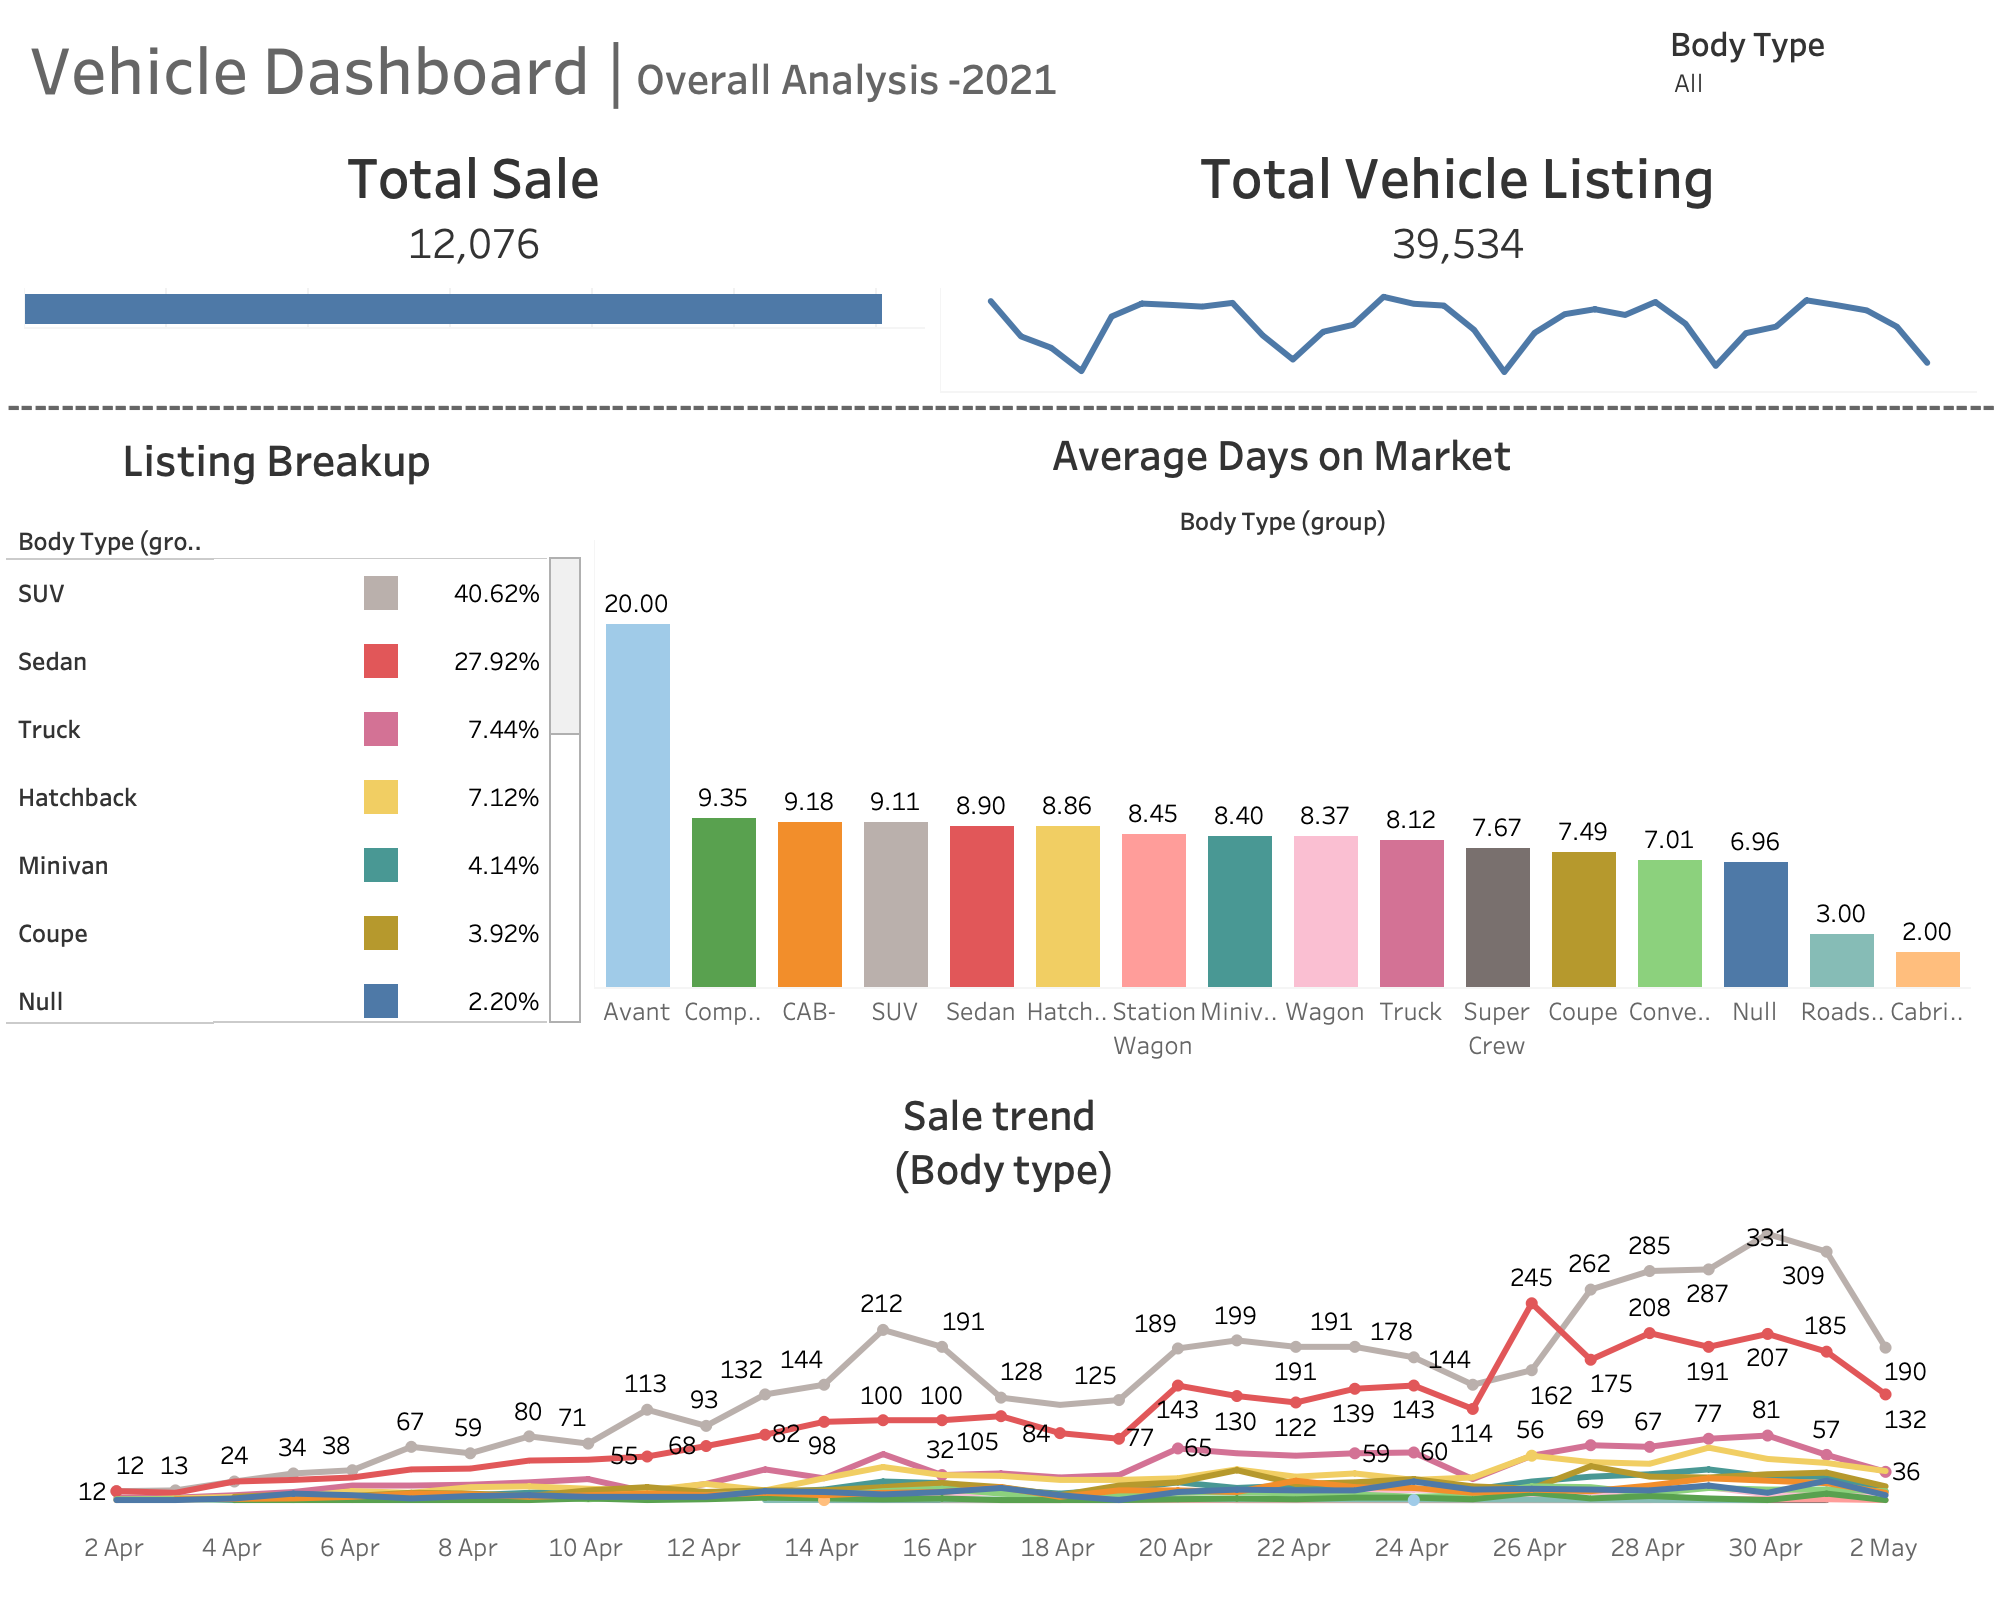

- Key points 
1. Total sale of vehicle(listing removed) 12,076 till May 2, 2021.
2. Total vehicle listed(first seen) including cutoff dates 39,534.(Listing would be reduced if data point's initial date is not included. assumption is that all vehicle at cutoff date are seen for the first time)
    - Every start of the week there is less listing and more vehicles get listed at the end of week for the given month.
3. Listing breakup- SUV and Sedan are most popular variants followed by truck and hatch back.
4. Average days on market - It shows how fast vehicles are delisted. Overall SuV and Sedan the major part of inventory moves to being delisted in 8-9 days. (Since days are averaged it wont be very reliable parameter unless sample size is taken into consideration)
5. The Sale trend shows sedan and suv having compratively higher sales as compared to the other model.

## 3.2 Mileage/private owned segregration by price

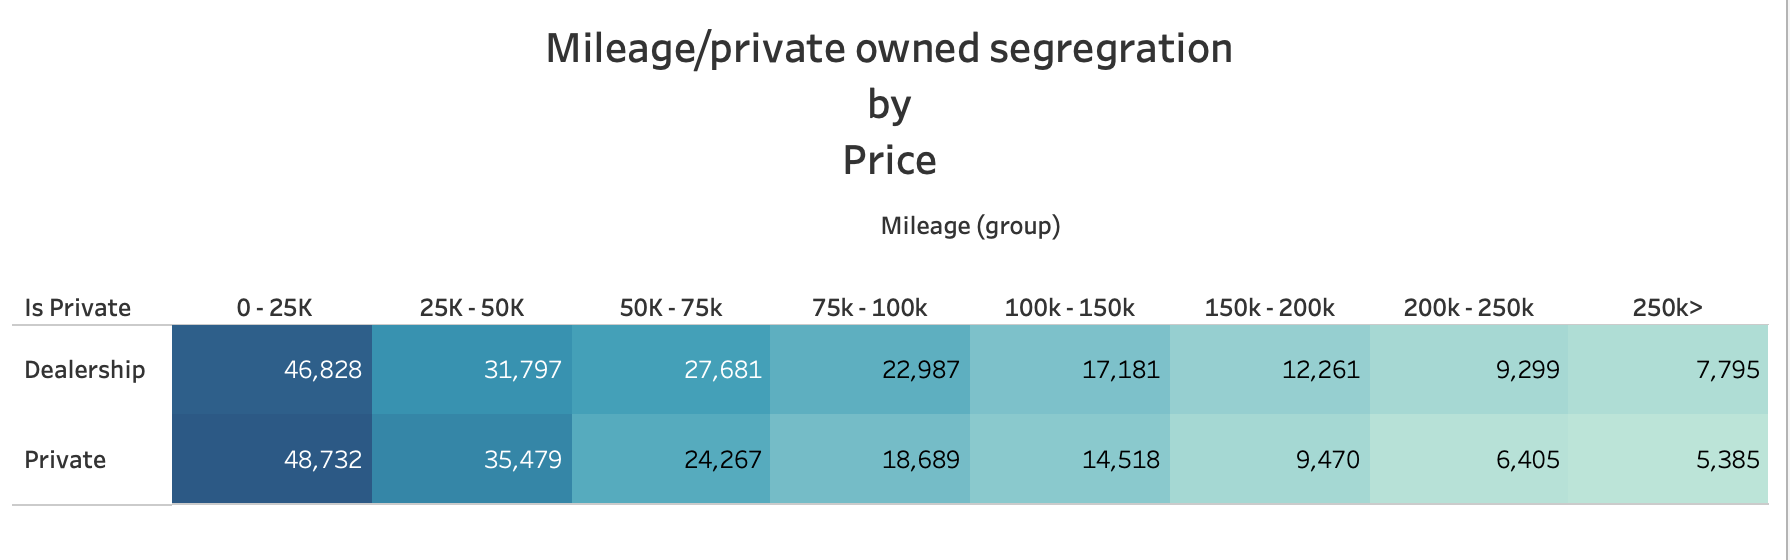

- Key Points  
1. Privately owned sellers tend to sell at higher price point for vehicles with less mileage(new vehicles) as compared to the old ones.
2. Dealers tend have to have more price for vehicles at mid age(interms of mileage)

## 3.3 Private/Dealership

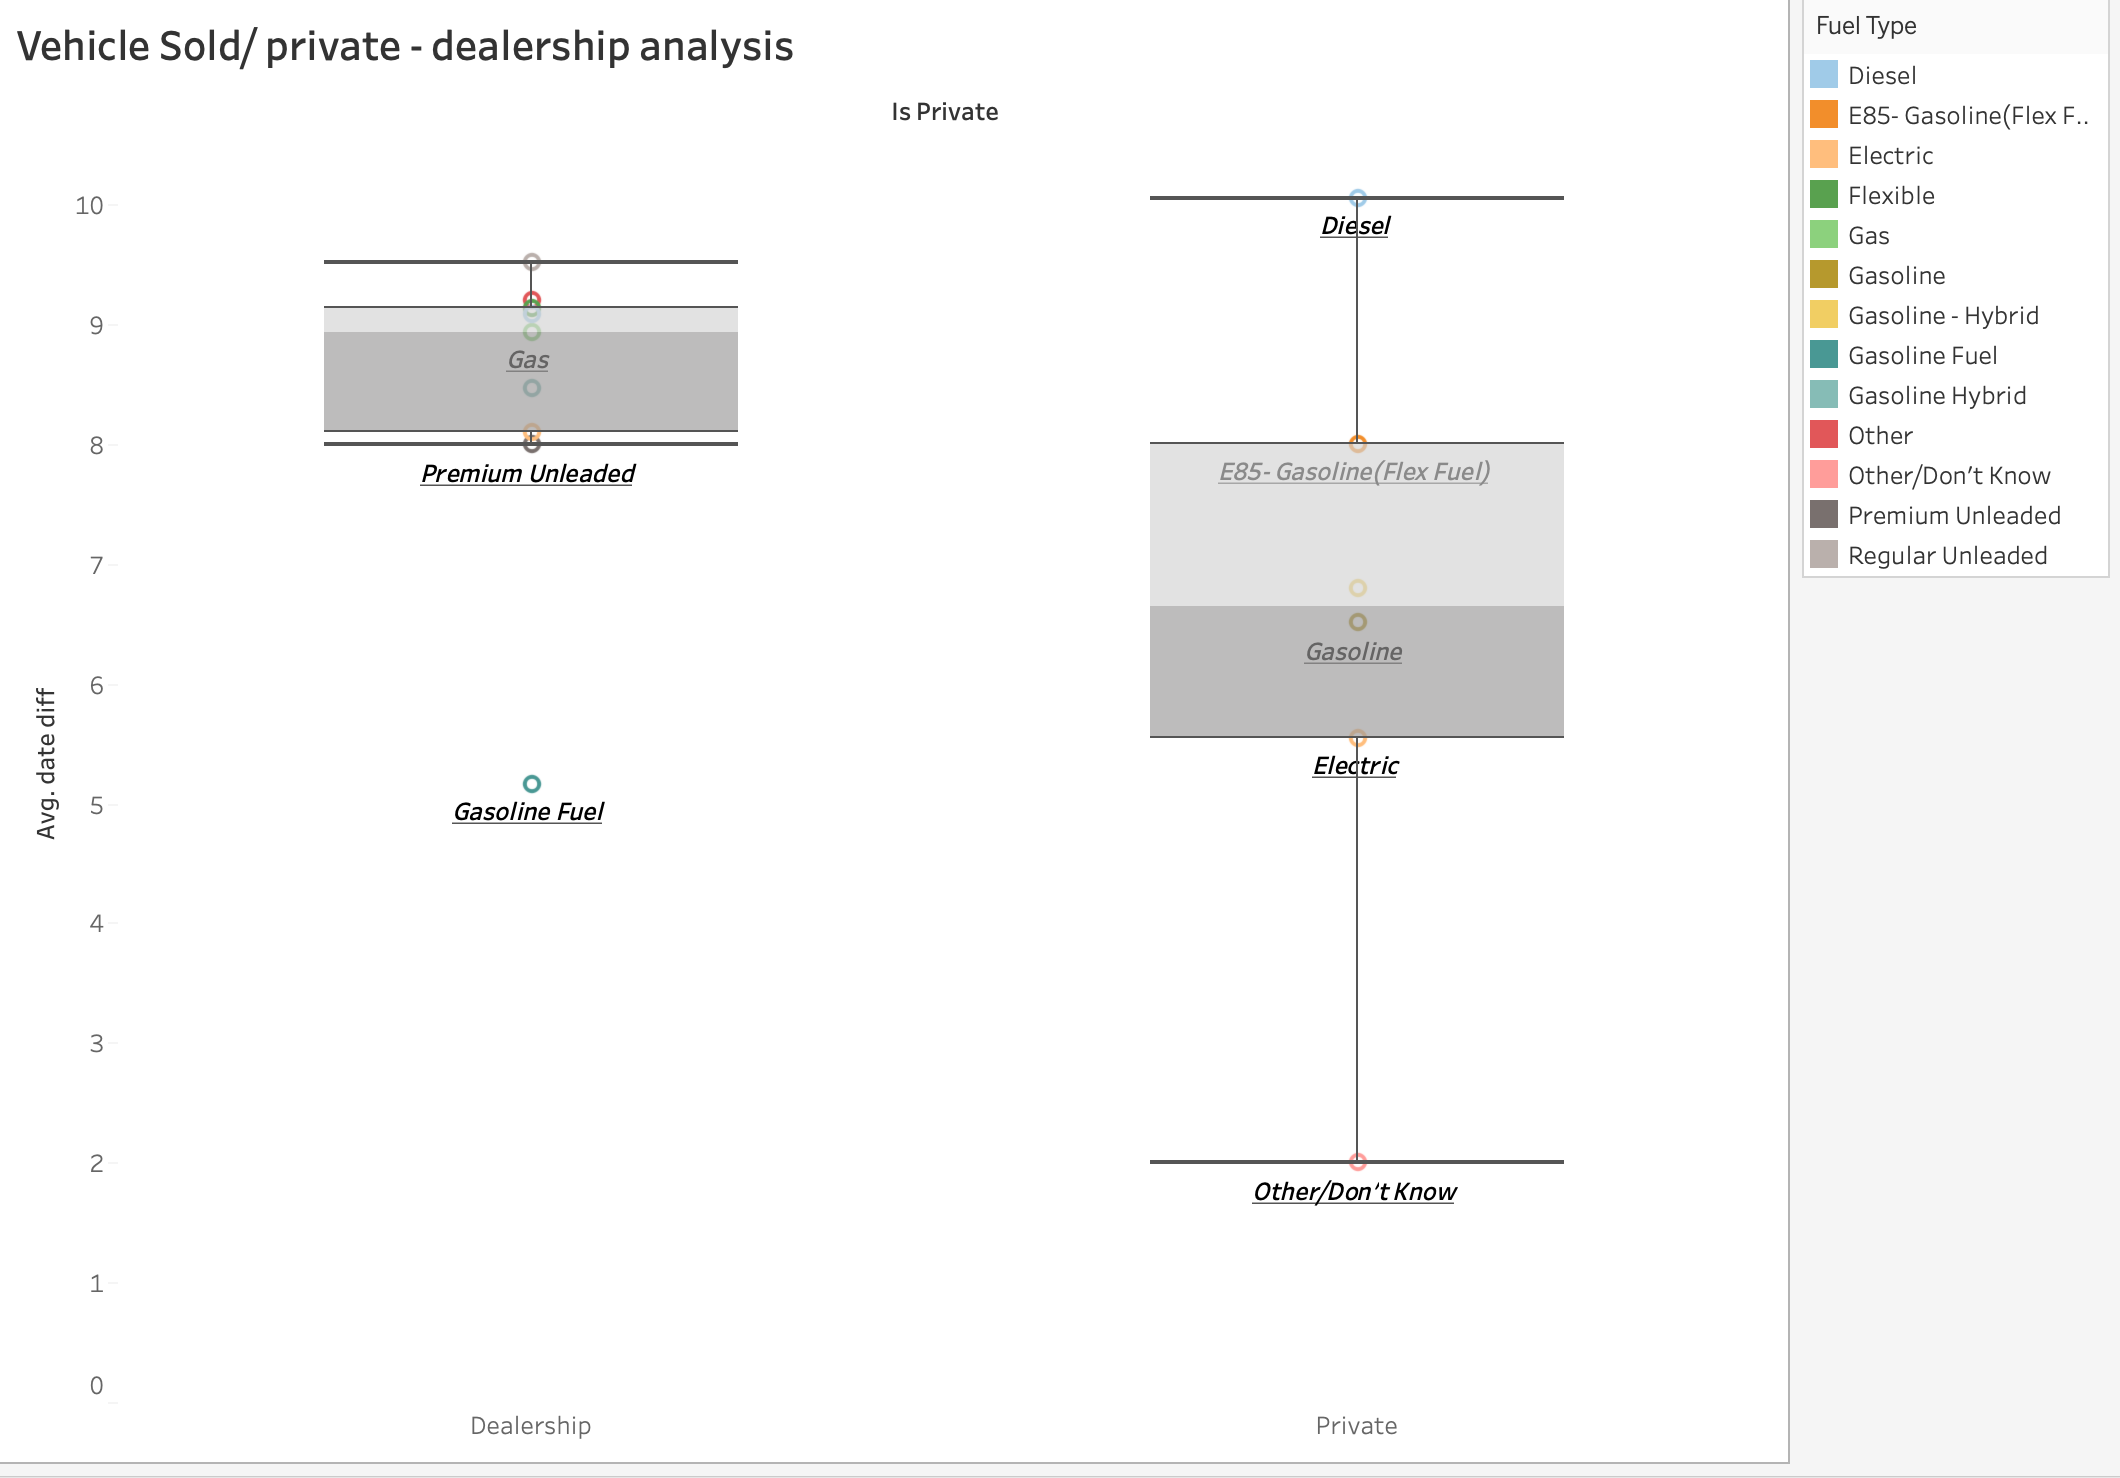

- Key points 
1. Dealership are able to sell more vehicles and faster across all type of vehicles 
2. Private seller have lot of variations when selling the cars in terms of days.

# 4. Final Analysis 

Any business insights from this dataset you would like to share? Any recommendations
for the business?
1. **Any issue with the dataset you find? What process/steps do you take to solve it?**
    - Missing values, duplicated values, High co-relation in some data points(Issue if building regression or ML models)
    
2. **Any other problems you are running into?**
    - Short period data. Analysis of this period might not yeild requisite insights required for the task.
    
3. **What steps do you take to clean/transform the data?**
    - Dropping the columns with high no. of missing values, substitution of the values , removing duplicates on the base of VIN
    
4. **If you have more time, what steps would you add to your work?**
    - Building a ML model predicting the vehicle sale, price valuation forecast based on similar data points 
    
4. **What other application/business problem could this dataset help to solve?**
    - This can help Acquistion team prioritise the fast selling models to build up the inventory and have less capital tied up inventory cost.